**Remark:** Das Notebook ist zur Veranschaulichung der Schritte für die finale Abgabe der Projektarbeit in der Veranstaltung **Praktische Datenanalyse**. Es gibt eine generelle Richtung der Datenanalyse vor, hat aber nicht den Anspruch alle Aspekte der Projektarbeit vollumfänglich und vollständig abzubilden.

# San Francisco Crime Classification

## Inhaltsverzeichnis:

1. [Einleitung und Requirements](#introduction)<br>
    a. [Kontext der Datenanalyse](#introduction1) <br>
    b. [Aufbau und Ablauf der Datenanalyse](#introduction2)<br>
    c. [Ziel Key Performance Indikatoren](#introduction3)<br>
    d. [Requirements und Systemanforderungen](#introduction4)<br>
2. [Data Understanding and Exploratory Data Analysis](#Collection)<br>
3. [Data Cleaning and Preparation](#Cleaning)
6. [Modelling](#ML)
7. [Modelloptimierungen](#Optimization)
8. [Ergebnispräsentation](#Present)
9. [Abschlussbericht und Emfehlungen](#Recommendation)

## 1. Einleitung und Requirements <a name="introduction"></a>

### 1.1. Kontext der Datenanalyse <a name="introduction1"></a>

Das übergreifende Thema der Datenanalyse ist die Entwicklung eines Modells, welches die Kategorie des Verbrechens für gegebene Inputdaten vorhersagt.

Zur Entwicklung des Modells verwenden wir ein Datenset aus **[San Francisco](https://www.kaggle.com/c/sf-crime)**, welches fast 12 Jahre an Verbrechensstatistiken enthält. Diese Statistiken enthalten nicht nur die Kateogrie, sondern geographische Informationen, den Zeitpunkt und weitere Informationen.

Wichtige Informationen über die Stadt San Francisco:

> Von 1934 bis 1963 war San Francisco berüchtigt für die Inhaftierung einiger der berüchtigtsten Verbrecher der Welt auf der unentrinnbaren Insel Alcatraz.

> Heute ist die Stadt eher für ihre Tech-Szene als für ihre kriminelle Vergangenheit bekannt. Doch mit zunehmender Ungleichheit im Wohlstand, Wohnungsmangel und einer Vielzahl teurer digitaler Spielzeuge, die mit der BART zur Arbeit fahren, gibt es in der Stadt an der Bucht keinen Mangel an Kriminalität.

-----

### 1.2. Aufbau und Ablauf der Datenanalyse <a name="introduction2"></a>

1. Für unsere Datenanalyse werden wir zuerst die **Daten sichten**, **bereinigen** und anschließend durch passende **Analysen und Visualisierungen** die Verbindungen zwischen den Daten kennenlernen. <br>

2. Anschließend werden wir die Daten für unsere ausgewählten **Machine Learning Modelle transformieren und optimieren**. <br>

3. Die **transformierten Daten** sind die Grundlage für den **Einsatz von Machine Learning Modelle**, welche besonders gut für die Vorhersage von **Mehrklassenwahrscheinlichkeiten** geeignet sind. Für unsere Analayse werden wir zwei Ansätze miteinander vergleichen, die beide auf Decision Tree Algorithmen basieren. Die erste Methode ist der klassische SKlearn `Random Forest`. Des Weiteren wird die optimierte Boosting Methode `Gradient Boosting`, die besonders für Multiklassen-Klassifizierungen geeignet ist.<br>

**Remark**: Hier oder in späteren Verlauf der Datenanlayse würden wir ein paar Argumente erwarten, warum der / die  jeweiliger/en Algorithme(n) ausgewählt wurden.

4. Zum Abschluss wird eine **Visualisierung der Ergebnisse präsentiert** und ein **Abschlussbericht über die Ergebnisse des Modells und der Datenanalyse bereitgestellt**. Darüber hinaus werden die **Optimierungspotenziale** aufgezeigt, welche bei der weiteren Optimierung der Datenanalyse als Aufsatzpunkt gelten können.

----

### 1.3. Ziel Key Performance Indikatoren <a name="introduction3"></a>

Die Ergebnisse werden mit dem Maß des **logarithmischen Mehrklassenverlusts** bewertet. Dieser stellt das vorhersagte Ereignis einer jeden Klasse mit der **Ground Truth** in Kontrast. Für ein bestimmtes Problem bedeutet ein niedrigerer logarithmischer Verlustwert bessere Vorhersagen. Mathematische Interpretation: Log Loss ist der negative Durchschnitt des Logarithmus der korrigierten Vorhersagewahrscheinlichkeiten für jede Instanz.

Für jeden Eintrag wird demnach eine Vorhersagewahrscheinlichkeit **für jede Klasse** berechnet. Die Formel lässt sich wie folgt herleiten:

> $$log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij}),$$

wobei,....
- N die Anzahl der Fälle in der Testmenge ist
- M die Anzahl der Klassen Lables ist, 
- \\(log\\) der natürliche Logarithmus ist, 
- \\(y_{ij}\\) 1 ist, wenn die Beobachtung \\(i\\) in der Klasse \\(j\\) ist, 
- und andernfalls 0 ist, und \\\(p_{ij}\\) die vorhergesagte Wahrscheinlichkeit ist,
- dass die Beobachtung \\(i\\) zur Klasse \\(j\\) gehört.

> Demnach möchten wir die Vorhersagewahrscheinlichkeit für die jeweilige Klasse optimieren.

Diese Bewertungsmethode ist deshalb gewählt, weil diese die Wahrscheinlichkeit aller Klassen optimiert in Kontext der **Ground Truth**. Dies gibt ein differenzierendes Bild ab als zum Beispiel die **Accuracy**, welche nur auf die tatsächlich vorhergesagte Klasse reagiert. Da wir Kriminalitätsstatistiken vorhersagen, kann aber auch die zweit- oder drittwahrscheinlichste Klasse einen guten Aufschluss geben für das Modell, gerade in Bezug der Nähe mancher Kriminalitätsklassen zueinander.

----

### 1.4. Requirements <a name="introduction4"></a>

Für die Datenanalyse werden eine Reihe von Libraries und Packages auf der Basis von Python genutzt, die die Analyse vereinfachen sollen. Anbei finden Sie eine kurze Aufführung der verwendeten Packages, Versionsnummern und eine kurze Beschreibung des Verwendungszweckes.

| Package  | Versionsnummer | Zweck |
|:--|:-:|:--|
| [Pandas](https://pandas.pydata.org/docs/) | 1.2.4 | Grundlegendes Package zur Manipulation und Transformation der Datensets |
| [Seaborn](https://seaborn.pydata.org/) | 0.11.1  | Package basierend auf Matplotlib für schnelle Visualisierungen von Daten  |
| [NumPy](https://numpy.org/) | 1.20.1 | Python-Bibliothek, die ein mehrdimensionales Array-Objekt, verschiedene abgeleitete Objekte (z. B. maskierte Arrays und Matrizen) und eine Reihe von Routinen für schnelle Operationen auf Arrays bereitstellt |
| [Matplotlib](https://matplotlib.org/) | 3.4.5 | Matplotlib ist eine umfassende Bibliothek zur Erstellung statischer, animierter und interaktiver Visualisierungen in Python |
| [Scipy](https://www.scipy.org/) | 1.6.2 | Das SciPy-Ökosystem umfasst allgemeine und spezielle Tools für die Datenverwaltung und -berechnung, produktive Experimente und Hochleistungsberechnungen |
| [Sklearn](https://scikit-learn.org/stable/) | 0.24.1 | Einfache und effiziente Tools für die prädiktive Datenanalyse |
| [Geopandas](https://geopandas.org/en/stable/) | 0.11.0 | GeoPandas ist ein Open-Source-Projekt, das die Arbeit mit Geodaten in Python erleichtert |
| [Shapely](https://shapely.readthedocs.io/en/stable/project.html) | 1.8.2 | Paket für die Manipulation und Analyse von flächigen geometrischen Objekten |
| [Pylab](https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm) | 3.4.5 | PyLab ist eine prozedurale Schnittstelle zur objektorientierten Plotting-Bibliothek Matplotlib |

Lasst uns die folgenden Packages in unsere Umgebung laden.

In [1]:
# Prüfen, ob Package installiert ist in Umgebung
import sys
import importlib.util
%matplotlib inline
%load_ext autoreload
%autoreload

packages = ["pandas", "seaborn", "numpy", "matplotlib", "scipy", "sklearn"]

for name in packages:
    try:
        __import__(name)
    except ImportError:
        print(name)
        !pip.main(['install', package])

In [2]:
# Importiere benötige Packages und gebe die Versionsnummer aus
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

from scipy import stats
from scipy.stats import chisquare
import scipy

import geopandas as gpd
from shapely.geometry import  Point

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import sklearn
import pylab

print('Sklearn:',sklearn.__version__)
print('Scipy:',scipy.__version__)
print('Matplotlib:',matplotlib.__version__)
print('NumPy:',np.__version__)
print('Seaborn:',sns.__version__)
print('Pandas:',pd.__version__)

# Lade eigens definierte Funktionen
import helper.data_prep as data_prep

Sklearn: 1.0.2
Scipy: 1.8.0
Matplotlib: 3.5.1
NumPy: 1.22.2
Seaborn: 0.11.2
Pandas: 1.4.1


## 2. Data Understanding and Exploratory Data Analysis <a name="Collection"></a>

### 2.1. Eräuterung des Datensets <a name="Collection2"></a>

Zur Datenanalyse und Training des Mehrklassenklassifizierungsmodelles haben wir zwei Datensets zur Verfügung. Ein **Trainingsset** und ein **Testset**. Beide Dateien sind im `csv` Format vorhanden und befinden sich im Ordner `./src/`.

**Beide Datensets (Trainings- und Testdatenset) haben folgende Spalten zur Verfügung:**
1. Datum - Datum und Uhrzeit des jeweiligen Verbrechens
2. DayOfWeek - Der Wochentag, an dem das Verbrechen geschehen ist
3. PdDistrict - Name des Police Department Districts
4. Address - Die ungefähre Straßenadresse des Verbrechens
5. X - Longitude des Verbrechens
6. Y - Latitute des Verbrechens

**Darüber hinaus enthält das Trainingsset noch folgende Informationen:**
1. Category - Kategorie des Verbrechenvorfalls --> **Zielvariable**<br>
2. Beschreibung - Detaillierte Beschreibung des Verbrechensvorfalls<br>
3. Resolution - Informationen darüber, wie der Vorfall aufgeklärt wurde

---------

### 2.2. Erstsichtung des Datensets <a name="Collection3"></a>

Als ersten Schritt laden wir die Datensets und verschaffen uns einen Überblick über die Spalten, Größe und Zusammensetzung des Datensets.

In [3]:
#Definiere die Filepaths für die Dateien
train_path = "./src/sf-crime/train.csv"
test_path = "./src/sf-crime/test.csv"

# Lade die Daten ins Jupyter Notebook
sfc_train_df = pd.read_csv(train_path,
                           sep = ',',
                           header = 0,
                           parse_dates = ['Dates'])                

sfc_test_df = pd.read_csv(test_path,
                           sep = ',',
                           header = 0,
                           parse_dates = ['Dates'],
                           index_col = 'Id')

In [4]:
print("---- Informationen über Größe des Datensets -----")
print("Training Dataset: ", sfc_train_df.shape)
print("Test Dataset: ", sfc_test_df.shape)

---- Informationen über Größe des Datensets -----
Training Dataset:  (878049, 9)
Test Dataset:  (884262, 6)


In [5]:
print("---- Informationen über die Spalten des Datensets -----")
print("Training Dataset Spalten: ", sfc_train_df.columns)
print("Test Dataset Spalten: ", sfc_test_df.columns)

---- Informationen über die Spalten des Datensets -----
Training Dataset Spalten:  Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')
Test Dataset Spalten:  Index(['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')


Nach der ersten Sichtung der Daten fällt auf, dass das Testset mit **884.262** Eintragungen größer ist als das Datenset für das Training des Modelles, welches nur **878.049** Eintragungen hat.<br>

Des Weiteren haben wir die beschriebenen Spalten im Trainingsdatenset. Im Testdatenset fehlen, wie schon in der Übersichtsseite des Datensets angegeben, die Spalten `Category`, `Descript` und `Resolution`.

Anschließend wollen wir uns einen ersten Überblick über die Datensätze erhalten:

In [6]:
sfc_train_df.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


Für das **Trainingsdatenset** können wir folgende Beobachtungen wahrnehmen:
- Das Datumsfeld `Dates`enthält Datum und Uhrzeit - eine Transformation in separate Spalten könnte hilfreich sein
- `Category` scheint eine kategoriale Variable zu sein
- `Descript`ist eine sehr kurze Beschreibungen mit wiederaufkommenden Werten
- `DayOfWeek`wird ziemlich wahrscheinlich von Monday bis Sunday gehen
- `PdDistrict`ist ein festes Format für ein Polizeidistrikt zu sein, ggf. auch kategorial
- `Resolution`ist nach einer ersten Vermutung auch kategorial
- `Adress`ist eine ungefähre Angabe, welche wahrscheinlich eine hohe Variabilität aufweist
- `X`und `Y` haben 6 Nachkommastellen, welche eine sehr genaue Ortsangabe bereitstellt. Ggf. können wir diese Daten aggregieren, um Distrikte abzuleiten

In [7]:
sfc_test_df.head(5)

,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


Für das **Testdatenset** können wir ähnliche Beobachtungen feststellen für die Spalten, die sowohl in Trainings- als auch Testdatenset vorhanden sind.

Nachdem wir einen ersten Eindruck über das Datenset erhalten haben, wollen wir die weiteren Sichtungen etwas präziser gestalten. Hierfür ziehen wir die Funktionen `.info`, `.describe` und `.nunique` heran.

In [8]:
sfc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


Bis auf X und Y, sind alle Werte als Objekt, also String hinterlegt. Die Spalte `Dates` ist als `datetime64[ns]` hinterlegt. Des Weiteren sind alle Werte befüllt, sodass wir keine größeren Data Cleaning Operationen für die Behandlung von fehlenden Werten vornehmen müssen. Dies können wir auch noch einmal kurz bestätigen:

In [9]:
print("---- Informationen über fehlende Werte im Train- und Test-Datenset -----")
print("Training Dataset Missing Values: ", sfc_train_df.isnull().sum())
print("-------")
print("Test Dataset Missing Values: \n", sfc_train_df.isnull().sum())

if sfc_train_df.isnull().sum().all() == 0 & sfc_test_df.isnull().sum().all() == 0:
    print("-------")
    print("Train- und Test-Datenset haben keine fehlenden Werte")

---- Informationen über fehlende Werte im Train- und Test-Datenset -----
Training Dataset Missing Values:  Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64
-------
Test Dataset Missing Values: 
 Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64
-------
Train- und Test-Datenset haben keine fehlenden Werte


In [10]:
sfc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884262 entries, 0 to 884261
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       884262 non-null  datetime64[ns]
 1   DayOfWeek   884262 non-null  object        
 2   PdDistrict  884262 non-null  object        
 3   Address     884262 non-null  object        
 4   X           884262 non-null  float64       
 5   Y           884262 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 47.2+ MB


Selbiges gilt für das Testdatenset.

In [11]:
print("Training Dataset Einzigartigkeit: \n", sfc_train_df.nunique())

Training Dataset Einzigartigkeit: 
 Dates         389257
Category          39
Descript         879
DayOfWeek          7
PdDistrict        10
Resolution        17
Address        23228
X              34243
Y              34243
dtype: int64


In [12]:
print("Test Dataset Einzigartigkeit: \n", sfc_test_df.nunique())

Test Dataset Einzigartigkeit: 
 Dates         392173
DayOfWeek          7
PdDistrict        10
Address        23184
X              34346
Y              34346
dtype: int64


Beobachtungen bei der Ausgabe der `unique Values` im Datenset:
- Keine der Variablen im Trainingsdatenset ist Unique und ein eindeutiger Identifier für den jeweiligen Datensatz
- Bei der Spalte für das Datum `Dates` haben wir noch am größten Variabilität, gefolgt von `Adress`, `X` und `Y`-Koordinaten
- Wir haben insgesamt 39 Kategorien in der Spalte `Category`, welche wir zu identifizieren haben für das Testdatenset
- `DayOfWeek` hat 7 Einträge, was auf die Vollständigkeit der Wochentage hinweist
- Es gibt insgesamt 10 Polizeidepartments (`PdDistrict`) in San Francisco
- Die Beschreibung des Verbrechens wird nicht kategorial sein mit knapp 900 unterschiedlichen Einträgen
- `Resolution` scheint eine Spalte mit 17 Kategorien zu sein

In [13]:
print(sfc_train_df.describe())
print(sfc_test_df.describe())

                   X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000
                   X              Y
count  884262.000000  884262.000000
mean     -122.422693      37.771476
std         0.030985       0.484824
min      -122.513642      37.707879
25%      -122.433069      37.752374
50%      -122.416517      37.775421
75%      -122.406959      37.784353
max      -120.500000      90.000000


Die Beschreibung der Datensets mit Hilfe von `.describe()` fällt eher spärlich aus. Da bis auf die X- und Y-Koordinaten alle Spalten als String ausgewiesen werden.

Bei den Koordinaten fällt auf, dass die Werte für X von -122.5 bis -120.5 gehen und für Y von 37.7  bis 90. 90 ist aber keine Koordinate, welche noch auf San Francisco zutrifft. Dies ist ein Indikator für fehlende oder falsche Werte. Darüber hinaus ist die Range zwischen den Werten sehr gering. Ggf. müssen wir dies bei der Transformation und Skalierung der Werte für einen Klassifikator berücksichtigen.

In [14]:
PdDistrict_Train = sfc_train_df.groupby('PdDistrict').count()['Dates']
PdDistrict_Test = sfc_test_df.groupby('PdDistrict').count()['Dates']
print("Training: \n\n", PdDistrict_Train, "\n\nTest: \n\n", PdDistrict_Test)
print("\n\nVergleich:\n  ", PdDistrict_Train.compare(other = PdDistrict_Test))

Training: 

 PdDistrict
BAYVIEW        89431
CENTRAL        85460
INGLESIDE      78845
MISSION       119908
NORTHERN      105296
PARK           49313
RICHMOND       45209
SOUTHERN      157182
TARAVAL        65596
TENDERLOIN     81809
Name: Dates, dtype: int64 

Test: 

 PdDistrict
BAYVIEW        89591
CENTRAL        86130
INGLESIDE      80084
MISSION       120449
NORTHERN      107017
PARK           50199
RICHMOND       44972
SOUTHERN      157456
TARAVAL        66617
TENDERLOIN     81747
Name: Dates, dtype: int64


Vergleich:
                 self   other
PdDistrict                
BAYVIEW      89431   89591
CENTRAL      85460   86130
INGLESIDE    78845   80084
MISSION     119908  120449
NORTHERN    105296  107017
PARK         49313   50199
RICHMOND     45209   44972
SOUTHERN    157182  157456
TARAVAL      65596   66617
TENDERLOIN   81809   81747


Beide Datensets enthalten diesselben 10 Police Departments und die Verteilung der eingetragenen Verbrechen ist ähnlich.

Nach initaler Recherche ist auch sichergestellt, dass es sich hierbei um die 10 PoliceDistricts von San Francisco handeln.

> The SFPD currently has 10 main police stations throughout the city in addition to a number of police substations.

>Metro Division:
>
>1) Central Station: 766 Vallejo St. San Francisco, CA 94133<br>
>2) Mission Station: 630 Valencia St. San Francisco, CA 94110<br>
>3) Northern Station: 1125 Fillmore St. San Francisco, CA 94115<br>
>4) Southern Station, Public Safety Building: 1251 3rd St. San Francisco, CA 94103<br>
>5) Tenderloin Station: 301 Eddy St. San Francisco, CA 94102<br>

>Golden Gate Division:
>
>6) Bayview Station: 201 Williams Ave. San Francisco, CA 94124<br>
>7) Ingleside Station: 1 Sgt. John V. Young Ln. San Francisco, CA 94112-2408<br>
>8) Park Station: 1899 Waller Street San Francisco, CA 94117<br>
>9) Richmond Station: 461 6th Ave San Francisco, CA 94118<br>
>10) Taraval Station: 2345 24th Ave. San Francisco, CA 94116<br>

Quelle: https://en.wikipedia.org/wiki/San_Francisco_Police_Department#Bureaus

Bevor wir die Verteilung der Werte visualisieren, würde ich zuerst einmal die Extreme für X und Y rausfiltern. Hierfür verwenden wir die Z-Score Berechnung.

Es sieht so aus, als ob jedes Datenset knapp ca. 67 Werte mit falschen Koordinaten haben. Diese müssen wir beim Data Cleaning berücksichtigen. Dies können wir durch eine passende Visualisierung auch noch einmal verdeutlichen.

/opt/homebrew/Caskroom/miniconda/base/envs/pda/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


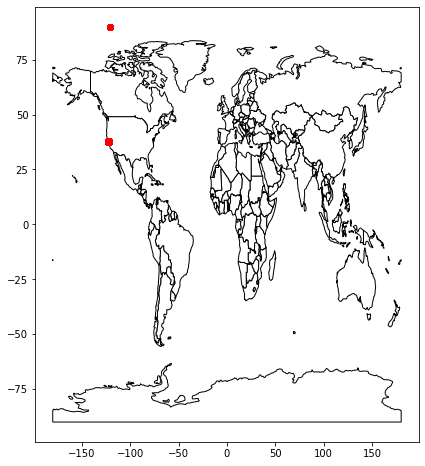

In [15]:
plt.rcParams["figure.figsize"] = (20,8)

def create_gdf(gdf):
    gdf = gdf.copy()
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))
    gdf.Coordinates = gdf.Coordinates.apply(Point)
    gdf = gpd.GeoDataFrame(gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return gdf

train_gdf = create_gdf(sfc_train_df)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
train_gdf.plot(ax=ax, color='red')
plt.show()

Des Weiteren würde ich mir gerne die Verteilungen für alle Spalten als Histogramme, Bar-Charts und Box Plots ausgeben lassen, um die Verteilungen und Kriterien als ersten Eindruck besser zu verstehen.
Hierfür wird jede Spalte auf ihren Datentyp geprüft. Wenn es eine kategoriale Variable mit weniger als 100 Ausprägungen ist, wird ein Bar Chart verwendet. Die nummerischen Variablen werden als Histogramm bzw. als Bar Plot ausgewiesen.

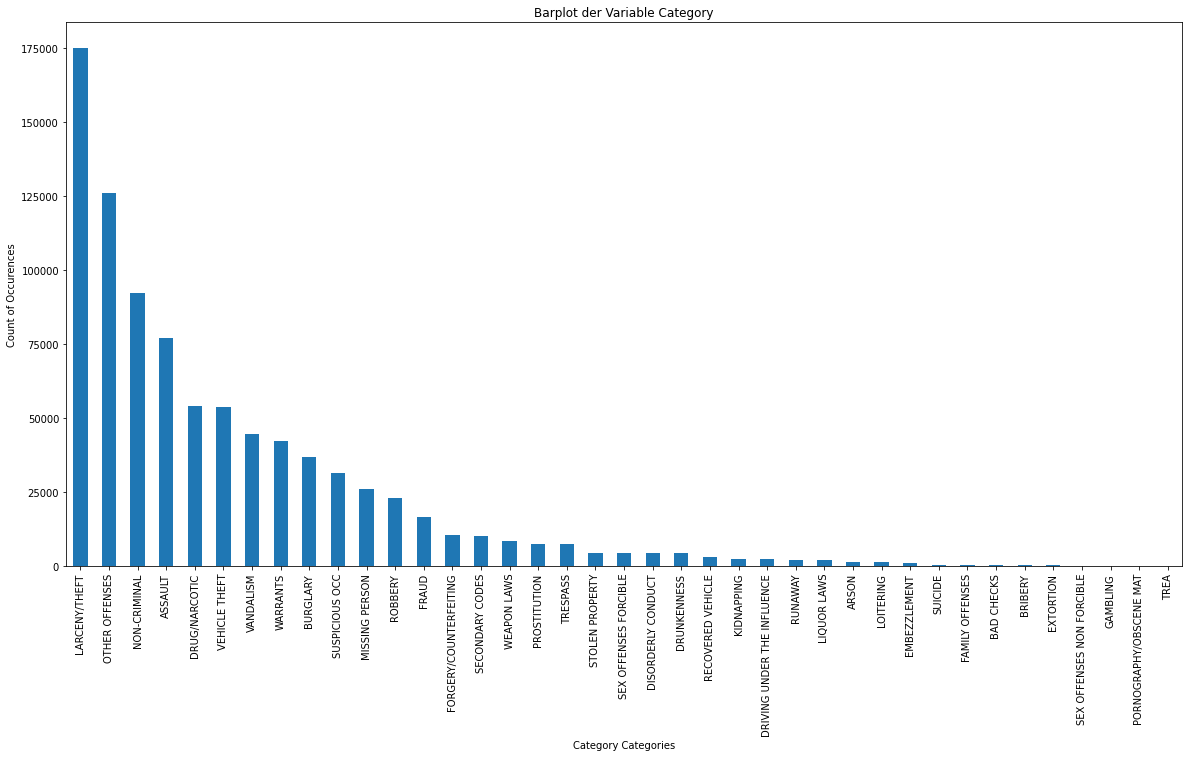

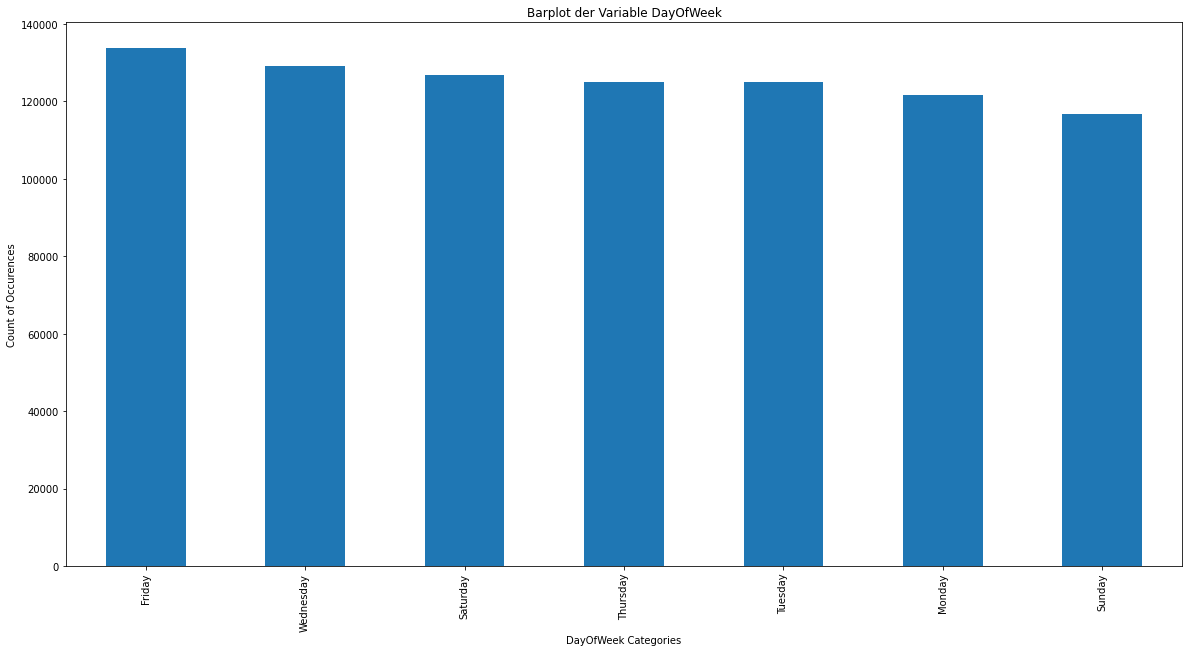

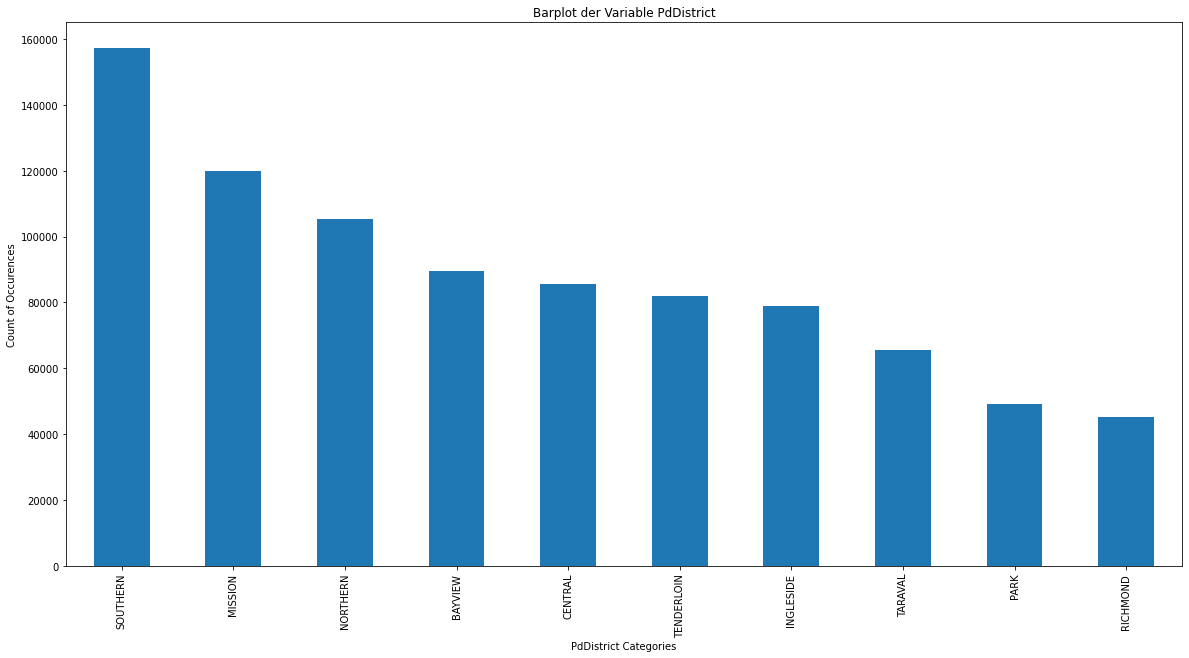

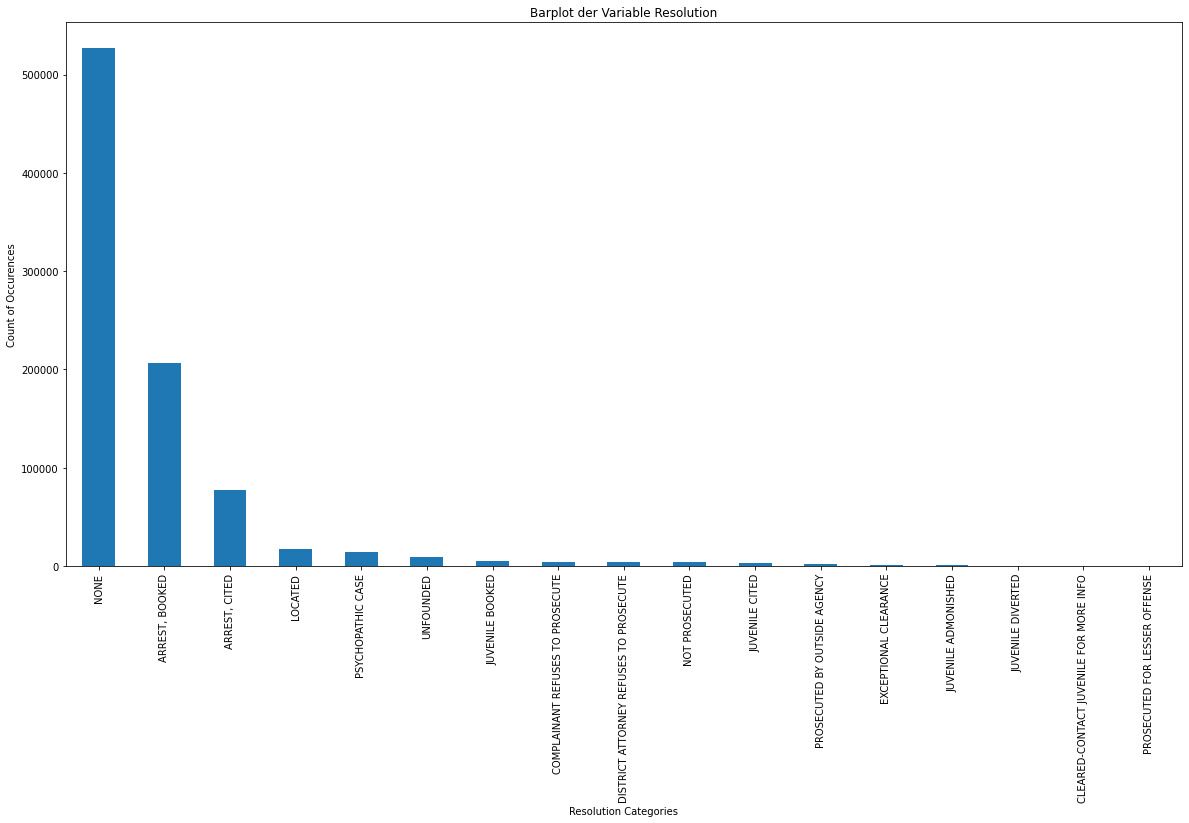

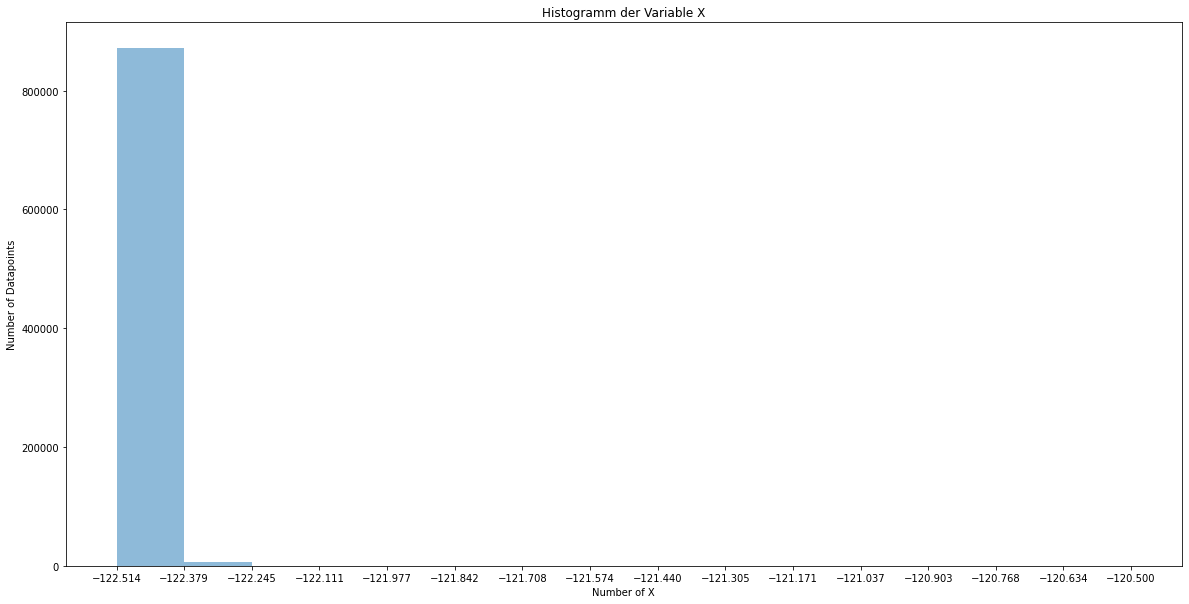

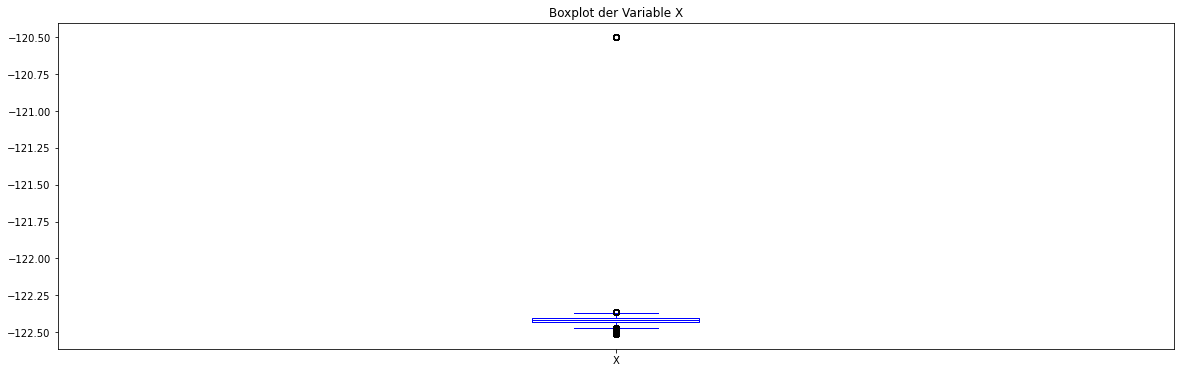

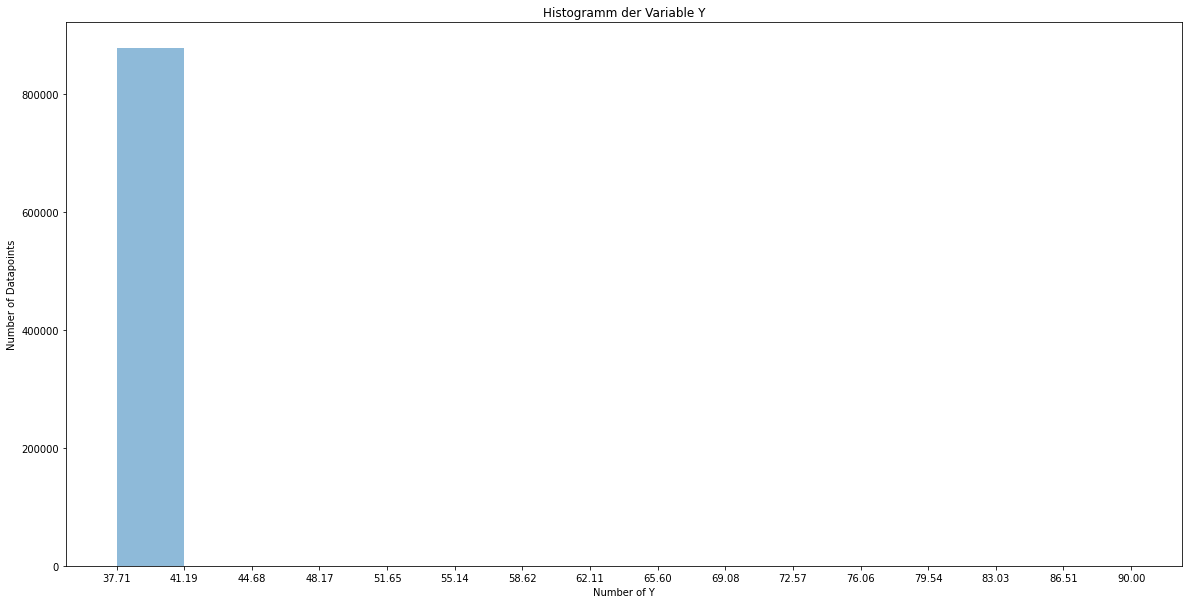

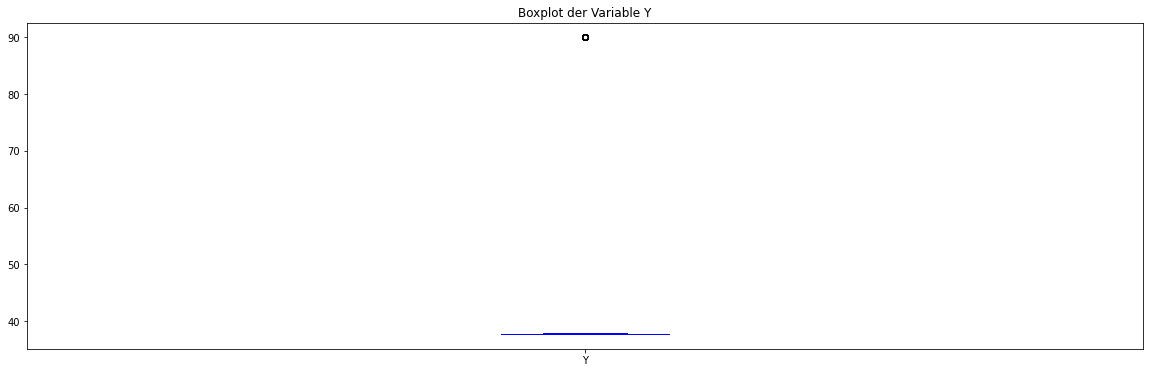

In [16]:
data_prep.dataset_visualization(sfc_train_df)

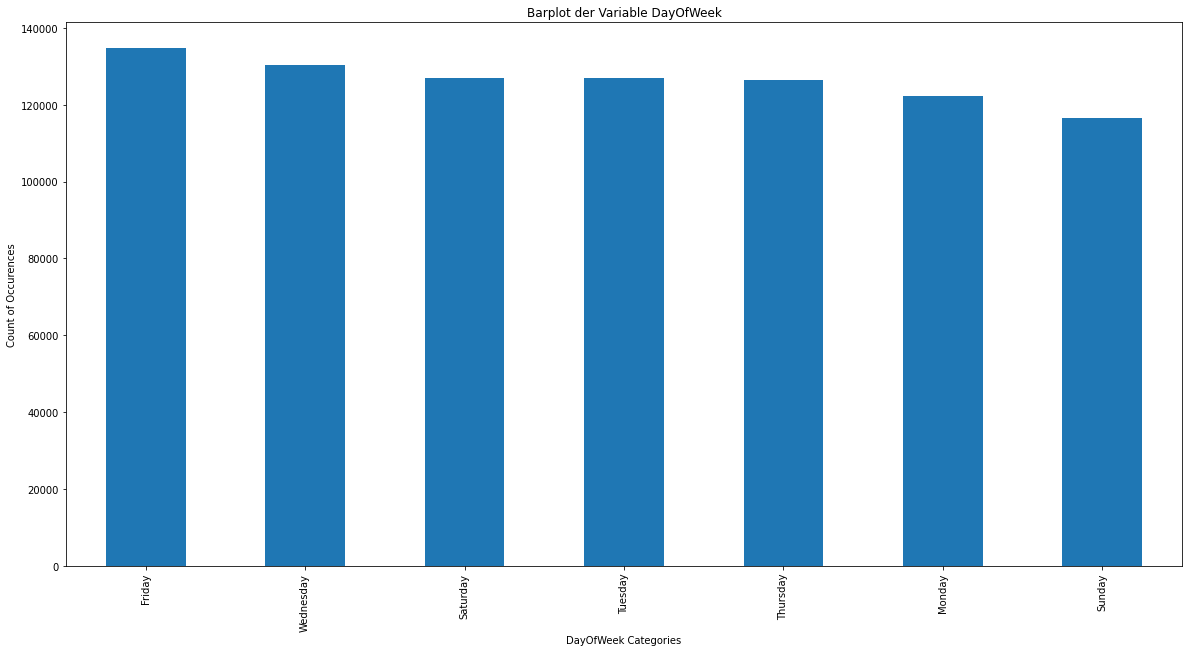

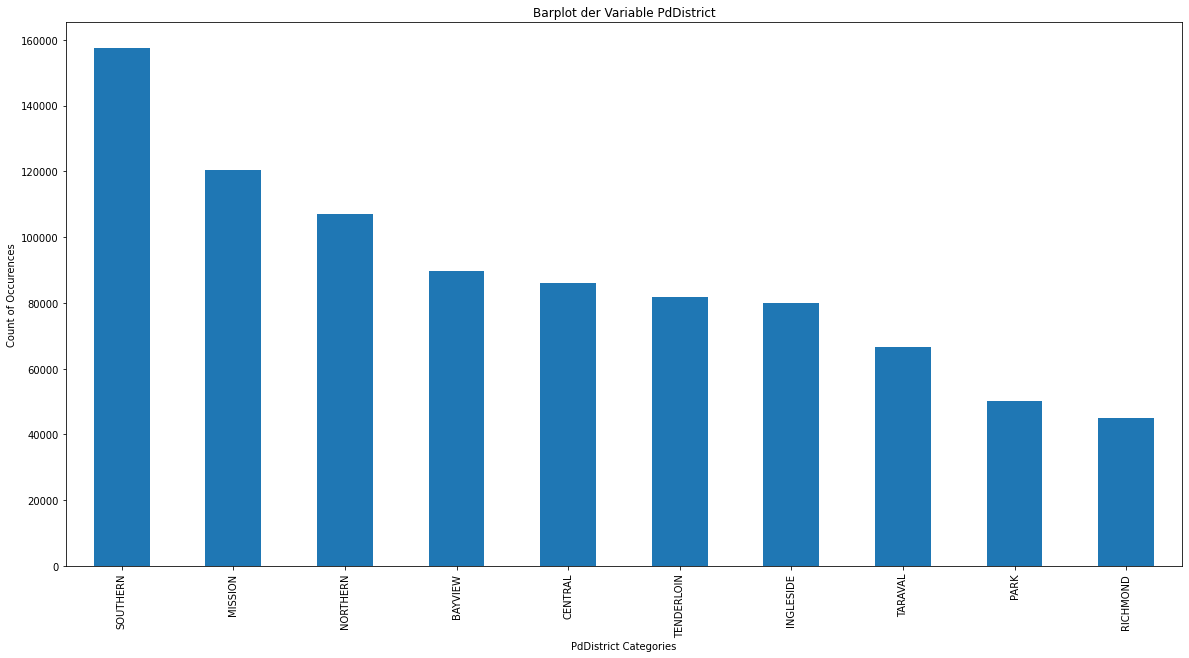

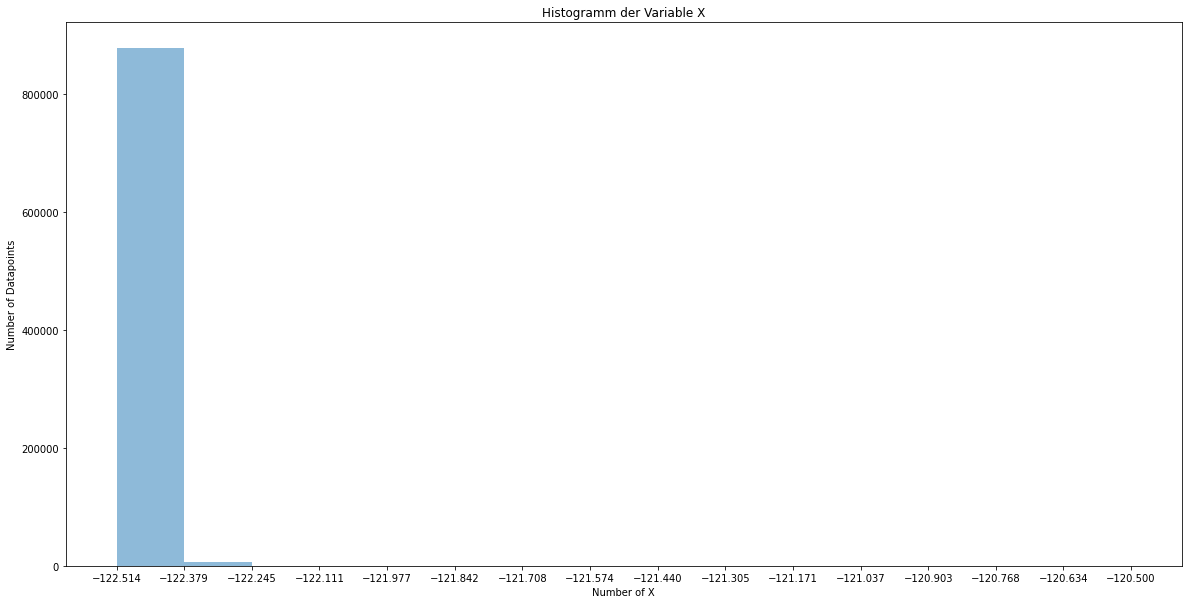

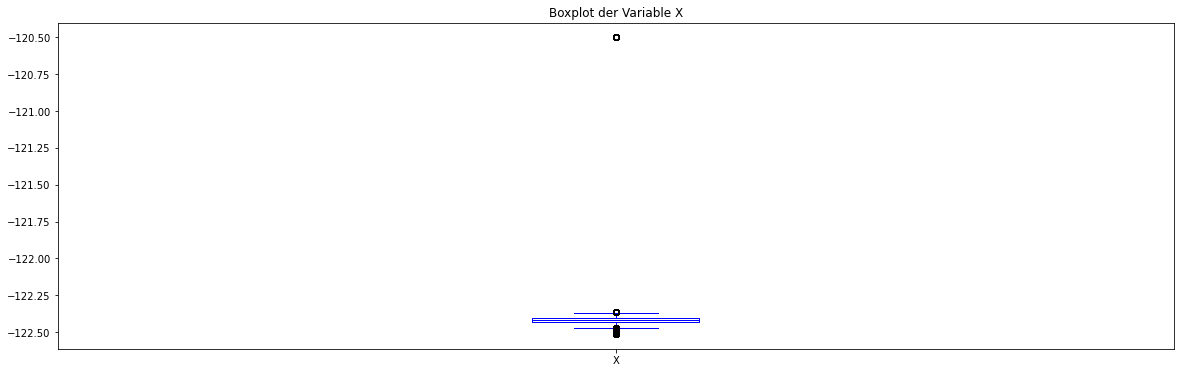

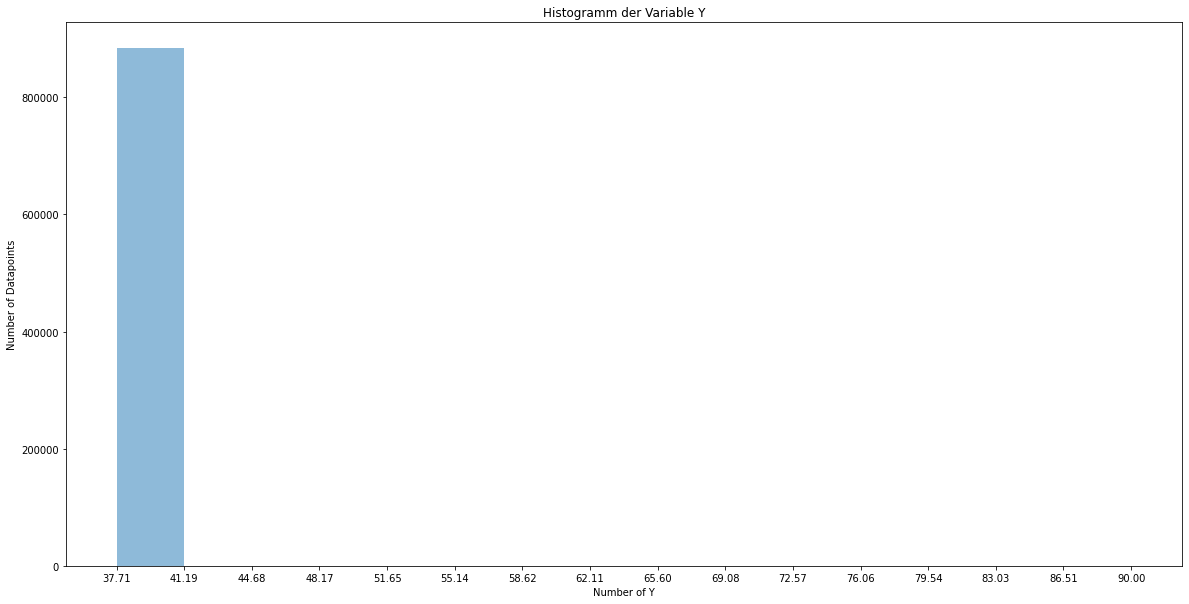

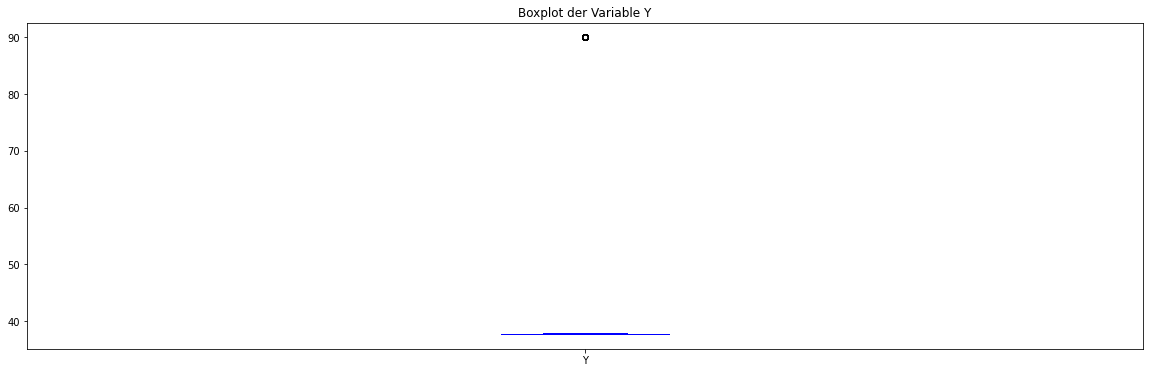

In [17]:
data_prep.dataset_visualization(sfc_test_df)

Die kategoriale Variable hat eine ungleiche Verteilung der auftretenden Verbrechen. Es gibt einige wenige, wie z. B. `Larency/Theft`, `Other Offenses`, `NON-Criminal` und `Aussault`, die im Verhältnis zu den anderen Verbrechen sehr häufig vorkommen. Dies gilt es später bei der Entwicklung des ML-Modelles zu berücksichtigen. Die Verteilung bei der `DayOfWeek` Variable ist zwischen dem Test- und Trainingsdatenset sehr ähnlich und zwischen den einzelnen Tagen relativ gleichverteilt. Ähnliches gilt für die Variablen `X` und `Y` im Trainings- und Testdatenset. Die Verteilungen sind sehr ähnlich zueinander. Des Weiteren haben wir die angesprochenen Outlier im Datenset, die wir im nächsten Schritt bereinigen müssen. Beim Merkmal `Resolution` gibt es einen Großteil der Verbrechen, die keine Aufklärung haben und viele Kategorien, die kaum bzw. fast gar nicht vorkommen.

Im nächsten Schritt wollen wir die Beziehungen zwischen den einzelnen Variablen stärker analysieren. Hierfür würden wir gerne die Verbrechenskategorien `Categories`, aufgeteilt auf die einzelen `PdDistricts`darstellen und analysieren.

Zur verbesserten Visualisierung würden wir nur die Top 15 `Categories` auswählen. Als Visualisierung wollen wir ein `Stacked Bar Chart` wählen.

Als ersten Schritt müssen wir die Daten Gruppen und Sortieren.

In [18]:
top_crimes= sfc_train_df[['Category', 'PdDistrict']] \
            .groupby(by='Category', axis = 0) \
            .count().sort_values(by='PdDistrict', ascending = False) \
            .head(15).index.tolist()

sfc_train_df_tc = pd.DataFrame(sfc_train_df[sfc_train_df['Category'].isin(top_crimes)] \
                  .groupby(by=['PdDistrict', 'Category']).size(), columns=['count']) \
                  .reset_index() \
                  .pivot(index='PdDistrict', columns = 'Category', values = 'count')

sfc_train_df_tc['Total'] = sfc_train_df_tc.sum(axis = 1)
sfc_train_df_tc.sort_values(by='Total', ascending=False, inplace= True)
sfc_train_df_tc.drop(columns='Total', axis = 1, inplace = True)

sfc_train_df_tc.loc['Total',:]= sfc_train_df_tc.sum(axis=0)
sfc_train_df_tc = sfc_train_df_tc.sort_values(by = 'Total', axis = 1, ascending=False)
sfc_train_df_tc.drop(index='Total', axis = 0, inplace = True)

sfc_train_df_tc

Category,LARCENY/THEFT,OTHER OFFENSES,NON-CRIMINAL,ASSAULT,DRUG/NARCOTIC,VEHICLE THEFT,VANDALISM,WARRANTS,BURGLARY,SUSPICIOUS OCC,MISSING PERSON,ROBBERY,FRAUD,FORGERY/COUNTERFEITING,SECONDARY CODES
PdDistrict,,,,,,,,,,,,,,,
SOUTHERN,41845.0,21308.0,19745.0,12183.0,9228.0,4725.0,6550.0,9102.0,4841.0,5065.0,3064.0,3878.0,3441.0,2345.0,1205.0
MISSION,18223.0,19330.0,12372.0,11149.0,8757.0,7148.0,5294.0,6615.0,3745.0,3808.0,3283.0,3629.0,1970.0,1281.0,1439.0
NORTHERN,28630.0,12233.0,10240.0,8318.0,4511.0,6291.0,5404.0,4599.0,5854.0,3270.0,1956.0,2640.0,2055.0,1292.0,999.0
BAYVIEW,10119.0,17053.0,6099.0,9857.0,4498.0,7219.0,5356.0,4322.0,3930.0,3906.0,5038.0,2715.0,866.0,774.0,1662.0
CENTRAL,25060.0,8901.0,10940.0,6977.0,1805.0,4210.0,4469.0,2777.0,4519.0,2842.0,1348.0,1999.0,2344.0,1144.0,704.0
TENDERLOIN,9903.0,13724.0,7467.0,7679.0,17696.0,1006.0,1616.0,7326.0,1488.0,2513.0,833.0,2202.0,1130.0,562.0,724.0
INGLESIDE,10236.0,13203.0,6853.0,8533.0,2373.0,8960.0,5374.0,2528.0,3331.0,3167.0,3181.0,2788.0,1213.0,977.0,1300.0
TARAVAL,11845.0,8614.0,6919.0,5463.0,1531.0,6142.0,4869.0,1617.0,3463.0,2996.0,3390.0,1405.0,1549.0,1097.0,983.0
PARK,9146.0,6184.0,5925.0,3515.0,2573.0,3963.0,2613.0,2318.0,2888.0,1656.0,2713.0,957.0,974.0,518.0,444.0


<AxesSubplot:xlabel='PdDistrict'>

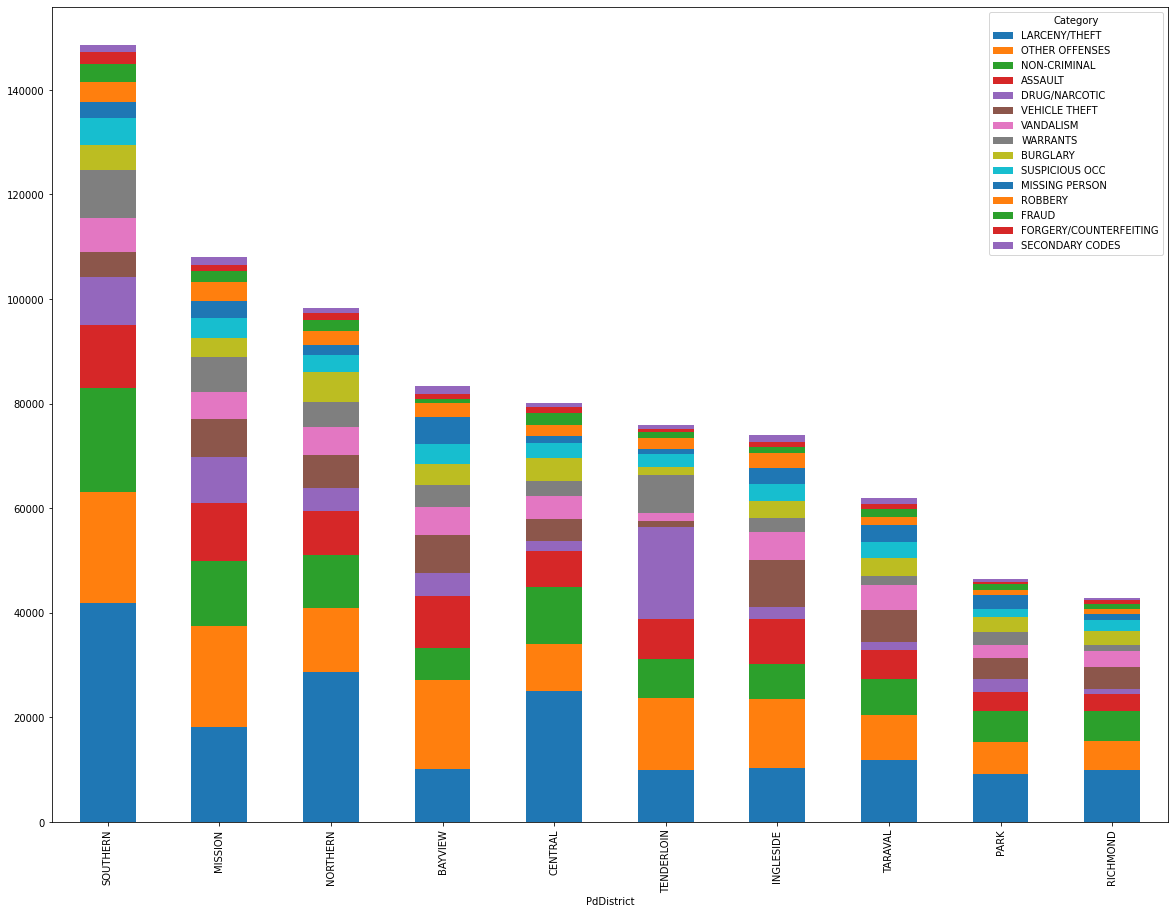

In [19]:
sfc_train_df_tc.plot(kind = 'bar', stacked = True, figsize=(20, 15), sort_columns = True)

Die Darstellung zeigt, dass es leichte Unterschiede in den Kategorien gibt per Police District, es aber keinen signifikanten Unterschied gibt. Die grundsätzliche Verteilung ist ausgeglichen.

Als nächstes würden wir gerne noch untersuchen, ob es Korrelationen zwischen den einzelnen Parametern gibt. Hierfür müssen wir die kategorischen Werte erst einmal transformieren. Hierzu verwenden wir [`pd.factorize`](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.factorize.html).

> Encode the object as an enumerated type or categorical variable.
  This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values. 

Anschließend berechnen wir die Pearson-Korrelation, die sich wie folgt berechnen lässt:

> $$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$$

> $$ r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}} $$

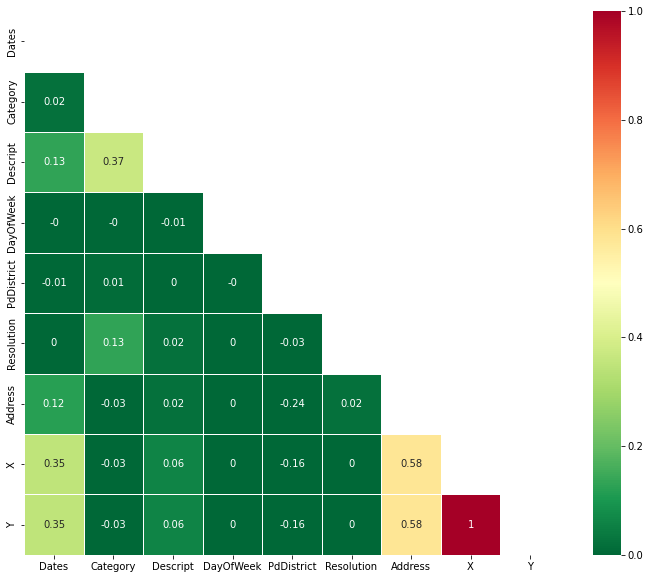

In [20]:
corr = sfc_train_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson').round(decimals=2)

# Erstelle eine Matrix mit False Werten
mask = np.zeros_like(corr, dtype=bool)

# Gibt die Indizes wieder für das "upper-triangle" des Arrays und setzt diese Werte auf "True"
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(data = corr,
                annot = True,
                vmin=0, vmax=1,
                linewidths = .5,
                cmap = 'RdYlGn_r',
                # Masked alle Werte des oberen "upper Triangles" in der Darstellung
                mask = mask)

Wir sehen, dass es keine wesentliche Korrelationen zwischen den Variablen gibt. Was einleuchtet ist, dass das Jahr stark korreliert mit dem Date, und dass die X und Y Korrelationen eine Korrelation mit der Adresse haben.

Möglicherweise macht es Sinn die Adresse aus dem Datenset zu entfernen, da Sie auch keine Merkmal im Testdatenset ist.

Als nächsten Schritt würden wir uns gerne die zeitliche Verteilung der Verbrechen angucken. Hierfür analyisieren wir erst einmal den übergreifenden Zeitraum.Die Darstellung zeigt, dass es leichte Unterschiede in den Kategorien gibt per Police District, es aber keinen signifikanten Unterschied gibt. Die grundsätzeliche Verteilung ist ausgeglichen.


In [21]:
print(sfc_train_df.Dates.min())
print(sfc_train_df.Dates.max())
print("----------------------")
print(sfc_test_df.Dates.min())
print(sfc_test_df.Dates.max())

2003-01-06 00:01:00
2015-05-13 23:53:00
----------------------
2003-01-01 00:01:00
2015-05-10 23:59:00


In [22]:
sfc_train_df['Date'] = sfc_train_df.Dates.dt.date
sfc_train_df['Hour'] = sfc_train_df.Dates.dt.hour
print("Mean frequency of incidents per day in Train: ", sfc_train_df.groupby(by="Date").count().mean()["Dates"])
print("Standard deviation of incidents per day in Train: ", sfc_train_df.groupby(by="Date").count().std()["Dates"])
print("-------------")
sfc_test_df['Date'] = sfc_test_df.Dates.dt.date
sfc_test_df['Hour'] = sfc_test_df.Dates.dt.hour
print("Mean frequency of incidents per day in Test: ", sfc_test_df.groupby(by="Date").count().mean()["Dates"])
print("Standard deviation of incidents per day in Test: ", sfc_test_df.groupby(by="Date").count().std()["Dates"])

Mean frequency of incidents per day in Train:  390.41751889728766
Standard deviation of incidents per day in Train:  48.79840397306309
-------------
Mean frequency of incidents per day in Test:  390.2303618711386
Standard deviation of incidents per day in Test:  48.19462818528178


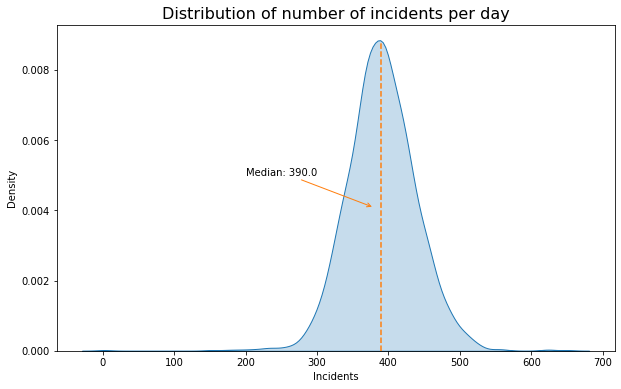

In [23]:
col = sns.color_palette()

plt.figure(figsize=(10, 6))
data = sfc_train_df.groupby('Date').count().iloc[:, 0]

sns.kdeplot(data=data, shade=True)

plt.axvline(x=data.median(), ymax=0.95, linestyle='--', color=col[1])

plt.annotate(
    'Median: ' + str(data.median()),
    xy=(data.median(), 0.004),
    xytext=(200, 0.005),
    arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))

plt.title(
    'Distribution of number of incidents per day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.show()

Es gibt auch keine signifikante Abweichung der Häufigkeit von Vorfällen während der Woche. Daher erwarten wir nicht, dass diese Variable eine signifikante Rolle bei der Vorhersage spielt.

In [24]:
sfc_train_df['DayOfWeek'] = sfc_train_df['Dates'].dt.weekday
sfc_train_df['Month'] = sfc_train_df['Dates'].dt.month
sfc_train_df['Year'] = sfc_train_df['Dates'].dt.year
sfc_train_df['Hour'] = sfc_train_df['Dates'].dt.hour

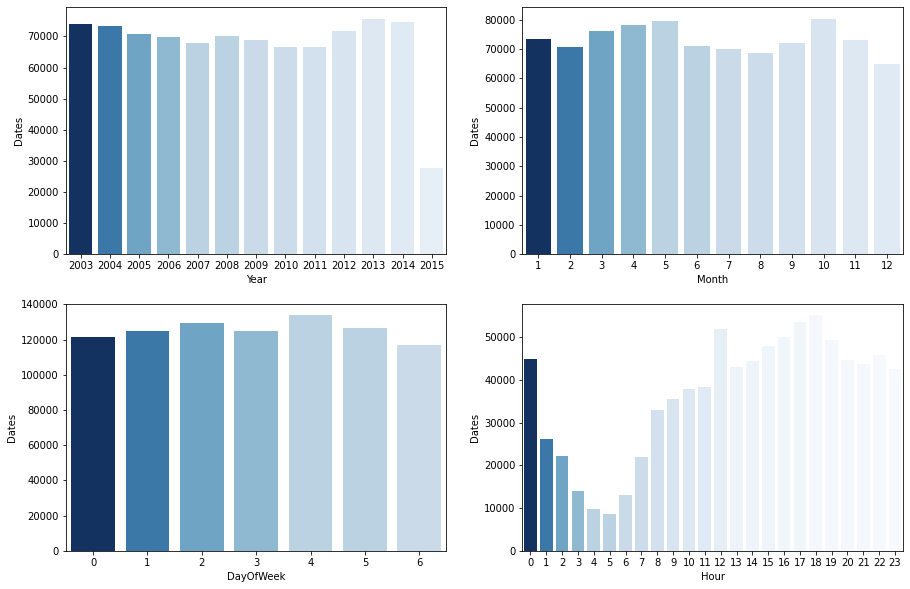

In [25]:
figure, axs = plt.subplots(2,2, figsize = (15,10))

data = sfc_train_df.groupby('Category').count()
data = data['Dates'].sort_values(ascending=False)

dates = ["Year", "Month", "DayOfWeek", "Hour"]
k = 0

for i in range(2):
    for j in range (2):
        sns.barplot(x=sfc_train_df.groupby(dates[k]).count().iloc[:,0].index,
        y= sfc_train_df.groupby(dates[k]).count().iloc[:,0],ax = axs[i][j],
        palette=cm.ScalarMappable(cmap='Blues').to_rgba(data.values))
        
        k += 1

plt.show()

Bis auf das Jahr 2015 ist die Anzahl der Verbrechen relativ gleich verteilt auf die Jahre. Gleiches gilt auch für die Unterscheidung auf Monate und Wochentage.

Bei der Darstellung der Stunden ist erkenntlich, dass die Verbrechenrate über Nacht abnimmt und Maximums hat während der Mittagszeit und den frühen Abendstunden. Das ist nachvollziehbar, weil dies die Zeiten sind, bei dem die Bevölkerung von San Francisco unterwegs ist.

## 3. Data Cleaning und Preparation <a name="Cleaning"></a>

Ziel der Datenbereinigung und Vorbereitung ist es, die Daten weitestgehend für die weitere Exploration vorzubereiten und Erkentnisse über die verfügbaren Daten zu erlangen. Wir haben bereits festgestellt, dass das Datenset keine fehlenden Werte aufweist. 

Folgende Operationen wollen wir im weiteren Verlauf durchführen:
1. Ersetzung der fehlerhaften Werte in den Variablen `X` und `Y` durch einen [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) in Abhängigkeit zum jeweiligen `PdDistrict`.
2. Sichtung auf Duplikate und das Entfernen von Duplikaten aus dem Dataset
3. Extraktion und Aufspaltung der Informationen aus der Spalte `Dates` für Machine Learning Modell
4. Überarbeitung des Merkmals `Adress` in `Block` und `Street`
5. Berechnung der Anzahl der Tage als `n_days` seit Beginn der Datenmessung mit Hilfe von `Date`

Die Durchführung der Schritte sind im nachfolgenden einzeln dargestellt.

### 3.1. Umgang mit inkorrekten Daten in `X` und `Y`

Für die Werte `'X': -120.5, 'Y': 90.0` wollen wir die Daten imputieren. Hierfür wollen wir die bereits vorab festgestellten 10 `PdDistrict`heranziehen. Die `PdDistrict` sind geographisch relativ gleichmäßig über San Francisco verteilt. Die falschen Werte würde wir gerne mit einem SimpleImputer ersetzen, welcher die durchschnittlichen geographischen Daten der Verbrechen pro `PdDistrict` heranzieht.

In [26]:
outlier_indexlist_train = data_prep.get_index_outlier(sfc_train_df, ["X", "Y"])
outlier_indexlist_test = data_prep.get_index_outlier(sfc_test_df, ["X", "Y"])

In [27]:
sfc_train_df, sfc_test_df = data_prep.simple_computer_group_by_index(sfc_train_df,
                                                           sfc_test_df,
                                                           outlier_indexlist_train,
                                                           outlier_indexlist_test,
                                                           ['X', 'Y'], 
                                                           'PdDistrict')

Überprüfen wir das Ergebnis durch eine Erstsichtung der imputierten Werte:

In [28]:
sfc_train_df.loc[outlier_indexlist_train, ['X', 'Y']]

,X,Y
660485,-122.412503,37.783802
660711,-122.393550,37.737256
660712,-122.393550,37.737256
661106,-122.412503,37.783802
666430,-122.412503,37.783802
...,...,...
844995,-122.428831,37.726543
845842,-122.428831,37.726543
852880,-122.405282,37.779915
857248,-122.393550,37.737256


Lasst uns anschließend noch einmal die Box-Plots visualisieren:

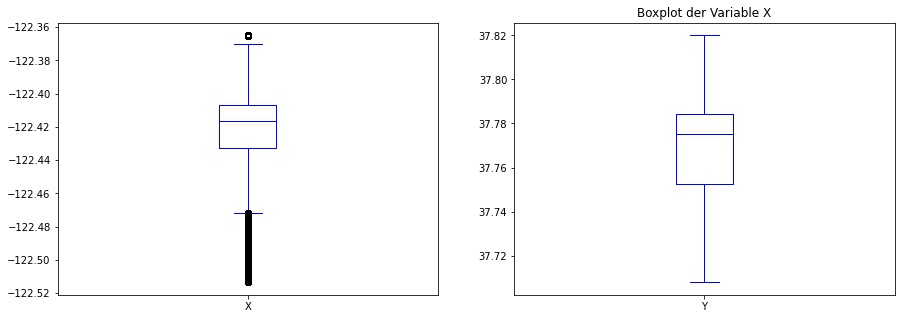

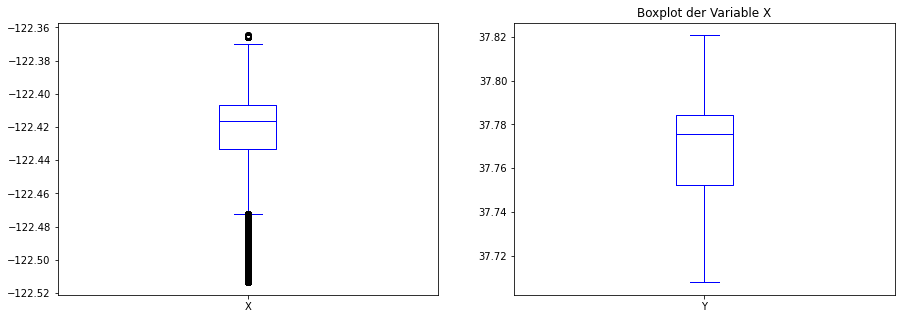

In [29]:
figure, axs = plt.subplots(1,2,figsize = (15,5))

sfc_train_df['X'].plot(kind='box', color='blue', vert=True, ax=axs[0])
plt.title('Boxplot der Variable {}'.format("X"))
sfc_train_df['Y'].plot(kind='box', color='blue', vert=True, ax=axs[1]) 

plt.show()

figure, axs = plt.subplots(1,2,figsize = (15,5))

sfc_test_df['X'].plot(kind='box', color='blue', vert=True, ax=axs[0])
plt.title('Boxplot der Variable {}'.format("X"))
sfc_test_df['Y'].plot(kind='box', color='blue', vert=True, ax=axs[1]) 

plt.show()

Die Werte wurden erfolgeich imputiert und die Darstellung zeigt nun eine sich annähernde Normalverteilung der Werte über die X und Y-Koordinaten. Wir können dies auch noch einmal in einem Histogram Plot visualisieren.

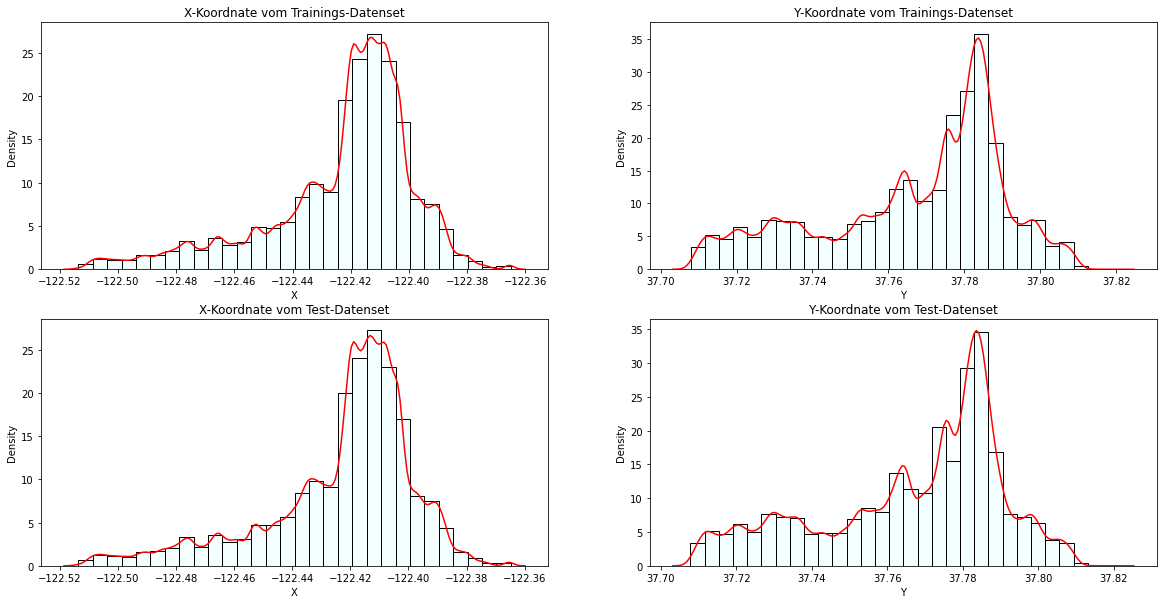

In [30]:
figure, axs = plt.subplots(2,2,figsize = (20,10))

sns.histplot(data = sfc_train_df, x = 'X', ax = axs[0, 0], bins = 30, stat='density', color = '#F0FFFF', )
sns.kdeplot(data = sfc_train_df, x = 'X', color='red', ax = axs[0, 0]).set_title('X-Koordnate vom Trainings-Datenset')

sns.histplot(data = sfc_train_df, x = 'Y', ax = axs[0, 1], bins = 30, stat='density', color = '#F0FFFF', )
sns.kdeplot(data = sfc_train_df, x = 'Y', color='red', ax = axs[0, 1]).set_title('Y-Koordnate vom Trainings-Datenset')

sns.histplot(data = sfc_test_df, x = 'X', ax = axs[1, 0], bins = 30, stat='density', color = '#F0FFFF', )
sns.kdeplot(data = sfc_test_df, x = 'X', color='red', ax = axs[1, 0]).set_title('X-Koordnate vom Test-Datenset')

sns.histplot(data = sfc_test_df, x = 'Y', ax = axs[1, 1], bins = 30, stat='density', color = '#F0FFFF', )
sns.kdeplot(data = sfc_test_df, x = 'Y', color='red', ax = axs[1, 1]).set_title('Y-Koordnate vom Test-Datenset')

plt.show()

Die Daten beim Test- und Trainingsdatenset sind relativ gleichverteilt. Es gibt einige Koordinaten, die den Schwerpunkt aller Verbrechen darstellen.

### 3.2. Umgang mit Duplikaten

Wir müssen prüfen, ob das Datenset Duplikate hat, die wir entfernen können. Der erste Schritt sollte sein, dass wir einmal prüfen wie viele und ob wir Duplikate haben.

In [31]:
sfc_train_df.duplicated().sum()

2323

Wir haben 2323 Werte, die Duplikate zu schein sein. Diese wollen wir aus dem Datenset entfernen.

In [32]:
rows = sfc_train_df.shape[0]

sfc_train_df.drop_duplicates(inplace=True)

# Check, ob das Entfernen der Duplikate funktioniert hat
rows - sfc_train_df.shape[0]

2323

Das hat funktioniert. Gehen wir zum nächsten Schritt. Alle weiteren Schritte werden nicht mehr für die Basismodellierung des Modells genommen und deshalb erstellen wir eine Zweitversion des DataFrames, die wir für die weitere Datentransformation verwenden.

In [33]:
sfc_train_df_2 = sfc_train_df
sfc_test_df_2 = sfc_test_df

### 3.3. Extraktion der Informationen aus Spalte Datum

Da wir die Transformation für `Dates` im Trainings- und Testdatenset vornehmen müssen, schreiben wir eine Funktion. Wir führen die Funktion noch nicht aus, da wir am Ende eine Pipeline für Train- und Testdatenset bilden wollen.

In [34]:
def dates_manipulation(df):
    
    df['Year'] = df['Dates'].dt.year
    df['Month'] = df['Dates'].dt.month
    df['Day'] = df['Dates'].dt.day
    df['DayOfWeek'] = df['Dates'].dt.weekday
    df['Hour'] = df['Dates'].dt.hour
    df['Minute'] = df['Dates'].dt.minute
    
    df = df.drop(columns=['Dates', 'Date'])
    
    return df

### 3.4. Überarbeiten des Merkmals `Address`:

Als nächstes wird das Merkmal `Address` überarbeitet. Wie angesprochen, würden wir den String gerne darauf prüfen, ob ein `Block` oder eine `Straße` im Namen enthalten ist.

Je nach Merkmal übergeben wir eine `1:Block`, ansonsten eine `0:Street`.

Auch hier schreiben wir wieder eine Funktion, welche wir nachher für Test- und Trainingsdatenset anwenden können.

In [35]:
def adress_manipulation(df):
    
    # Prüft, ob in der Spalte das Wort 'block' enthalten ist, und applied wenn True = 1, sonst 0
    df['Block'] = df['Address'].str.contains('block', case=False).apply(lambda x: 1 if x == True else 0)
    
    df = df.drop(columns=['Address'])
    
    return df

### 3.5. Erweiterung der Spalten durch Anzahl der Tage

Zur Verbesserung des Modelles würde ich gerne die Tage berechnen, die seit dem Minimum vergangen sind, bis das Verbrechen eingetreten ist. Dies soll als weitere zeitliche Komponente dienen:

```python
 data['n_days'] = (data['Date'] - data['Date'].min()).apply(lambda x: x.days)
```

In [36]:
def day_calculation(df):
    
    df['n_days'] = (df['Date'] - df['Date'].min()).apply(lambda x: x.days)
    
    return df

**Merkmalsskalierung:** Durch die Entscheidung, mit einem baumbasierten Algorithmus fortzufahren, war eine Skalierung des endgültigen Datensatzes nicht erforderlich.

## 4. Modelling

Als ersten Ansatz zur Modellierung eines Modells verwenden wir den Algorithmus `Random Forest`. Random Forest ist einer Erweiterung des `Decision Tree` Algorithmus, der durch die Nutzung diverser `Decision Trees` das Problem von Overfitting vermeidet und die Akkuratheit des Modells verbessert. Das Modell gibt uns "Probabilities" für jede Klasse zurück, welche wir dann für unsere Evaluierungsmethode benötigen.

Wir wählen es auch aus, weil es eine hohe Accuracy verspricht und zeitgleich relativ wenig Berechnungszeit braucht. Interpretierbarkeit ist hierbei vernachlässigbar.

Darüber hinaus wählen wir einen `Gradient-Boosting-Algorithmus` aus. `Gradient-Boosting-Algorithmus` sind eine Gruppe von Algorithmen des maschinellen Lernens, die viele schwache Lernmodelle miteinander kombinieren, um ein starkes Vorhersagemodell zu erstellen. Beim Gradient Boosting werden in der Regel Entscheidungsbäume verwendet. Gradient-Boosting-Modelle werden aufgrund ihrer Effektivität bei der Klassifizierung komplexer Datensätze immer beliebter und wurden in letzter Zeit bei vielen Kaggle-Wettbewerben für Data Science eingesetzt.

Als erstes Erstellen wir eine Baseline, an der wir uns vor der weiteren Optimierung orientieren können.

In [37]:
#Preparation of the Data
y = sfc_train_df['Category']
X = sfc_train_df.drop(columns=['Category'])

X.drop(columns=['Dates','Date','Address', 'Resolution', 'Descript'], inplace=True)

le1 = LabelEncoder()
X['PdDistrict'] = le1.fit_transform(X['PdDistrict'])

le2 = LabelEncoder()
y = le2.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Nun führen wir das Modell aus und erhalten unsere erste Vorhersage:

In [39]:
# GradientBoostingClassifier
clf_2 = GradientBoostingClassifier(random_state=42)
clf_2.fit(X_train, y_train)
predictions_GBC = clf_2.predict(X_test)

print(classification_report(y_test,predictions_GBC))

              precision    recall  f1-score   support

           0       0.08      0.02      0.03       462
           1       0.19      0.06      0.09     23200
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00        96
           4       0.17      0.00      0.00     10958
           5       0.22      0.05      0.08      1295
           6       0.06      0.00      0.01       680
           7       0.33      0.35      0.34     16230
           8       0.00      0.00      0.00      1297
           9       0.01      0.00      0.00       337
          10       0.00      0.00      0.00        71
          11       0.00      0.00      0.00       154
          12       0.17      0.02      0.03      3151
          13       0.25      0.00      0.00      5100
          14       0.00      0.00      0.00        47
          15       0.00      0.00      0.00       673
          16       0.28      0.77      0.41     52161
          17       0.08    

Die Basis für weitere Optimierungen bildet das Ergebnis mit dem Basisdatensatz, in dem nur die folgenden Operationen oben durchgeführt worden sind.

Im nächsten Schritt müssen wir alle unsere Funktionen in die Transformation des Test- und Trainingsdatenset einbinden. Hierfür erstellen wir ein Objekt, welches wir in die Transformationspipeline einbinden können.

In [40]:
def transform(X):
        
    X = day_calculation(X)
    X = dates_manipulation(X)
    X = adress_manipulation(X)

    return X




Anschließend nutzen wir das Dictionary für unseren `GridSearchCV` Algorithmus und lassen uns die Ergebnisse über `.cv_results` in einer sepraten Tabelle ausgeben:

In [41]:
#Preparation of the Data
y_2 = sfc_train_df['Category']
X_2 = sfc_train_df.drop(columns=['Category'])
X_2 = transform(X_2)
X_2.drop(columns=['Descript','Resolution'], inplace=True)


le1 = LabelEncoder()
X_2['PdDistrict'] = le1.fit_transform(X_2['PdDistrict'])

le2 = LabelEncoder()
y_2 = le2.fit_transform(y_2)

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.30, random_state=42)



In [42]:
# Random Forest
clf_3 = RandomForestClassifier(random_state=42)
clf_3.fit(X_2_train, y_2_train)
predictions_RF_2 = clf_3.predict(X_2_test)

print(classification_report(y_2_test,predictions_RF_2))



              precision    recall  f1-score   support

           0       0.07      0.02      0.03       462
           1       0.23      0.23      0.23     23200
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00        96
           4       0.17      0.11      0.13     10958
           5       0.04      0.02      0.03      1295
           6       0.04      0.02      0.02       680
           7       0.38      0.43      0.40     16230
           8       0.00      0.00      0.00      1297
           9       0.04      0.01      0.02       337
          10       0.02      0.01      0.02        71
          11       0.15      0.06      0.09       154
          12       0.17      0.10      0.12      3151
          13       0.11      0.06      0.08      5100
          14       0.12      0.04      0.06        47
          15       0.02      0.01      0.02       673
          16       0.39      0.64      0.49     52161
          17       0.09    

In [43]:
# GradientBoostingClassifier
clf_4 = GradientBoostingClassifier(random_state=42)
clf_4.fit(X_2_train, y_2_train)




GradientBoostingClassifier(random_state=42)

In [44]:
predictions_GBC_2 = clf_4.predict(X_2_test)
print(classification_report(y_2_test,predictions_GBC_2))



              precision    recall  f1-score   support

           0       0.08      0.01      0.02       462
           1       0.19      0.15      0.17     23200
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00        96
           4       0.19      0.01      0.02     10958
           5       0.25      0.06      0.09      1295
           6       0.25      0.00      0.01       680
           7       0.34      0.36      0.35     16230
           8       0.10      0.00      0.00      1297
           9       0.00      0.00      0.00       337
          10       0.00      0.00      0.00        71
          11       0.00      0.00      0.00       154
          12       0.17      0.03      0.06      3151
          13       0.20      0.01      0.01      5100
          14       0.00      0.00      0.00        47
          15       0.03      0.00      0.00       673
          16       0.31      0.77      0.44     52161
          17       0.09    

Zur Bewertung der einzelnen Berechnungen ziehen wir nun den Log Loss heran. Hierfür vergleichen wir die jeweiligen Ergebnisse der Algorithmen miteinander und sehen, wie sich der Log Loss verändert.

In [45]:
predict_prob_rf = clf_1.predict_proba(X_test)
predict_prob_gbc = clf_2.predict_proba(X_test)
predict_prob_rf_2 = clf_3.predict_proba(X_2_test)
predict_prob_gbc_2 = clf_4.predict_proba(X_2_test)

lg_loss_1 = log_loss(y_true = y_test, y_pred = predict_prob_rf, labels = np.array(list(set(y_test))))
lg_loss_2 = log_loss(y_true = y_test, y_pred = predict_prob_gbc, labels = np.array(list(set(y_test))))
lg_loss_3 = log_loss(y_true = y_2_test, y_pred = predict_prob_rf_2, labels = np.array(list(set(y_2_test))))
lg_loss_4 = log_loss(y_true = y_2_test, y_pred = predict_prob_gbc_2, labels = np.array(list(set(y_2_test))))

print("Random Forest ohne Transformation: ", lg_loss_1)
print("Random Forest mit Transformation: ", lg_loss_3)
print("Gradient Boosting Classifier ohne Transformation: ", lg_loss_2)
print("Gradient Boosting Classifier mit Transformation: ", lg_loss_4)



Random Forest ohne Transformation:  5.5764423335757805
Random Forest mit Transformation:  4.775145952429612
Gradient Boosting Classifier ohne Transformation:  2.5667079140038243
Gradient Boosting Classifier mit Transformation:  2.376814594167438


Das Minimum unseres Zielkriteriums wird mit der Transformation auf Basis des Gradient Boosting Classifiers erreicht. Hiermit waren wir in der Lage die Baseline von Random Forest von 5.5 auf 2.3 zu reduzieren. 

<span style="color:red">**Weitere Interpretation der Ergebnisse?**<span>

In [47]:
import pickle

# Save the model to save the retrain time
filenames = ['RFwoT.sav', 'RFwT.sav', 'GBCwoT.sav', 'GBCwT.sav']
models = [clf_1, clf_3, clf_2, clf_4]

for i in range(4):
    pickle.dump(models[i], open(filenames[i], 'wb'))
    
    

## 5. Ergebnispräsentation <a name="Present"></a>

<span style="color:red">**Darstellung der Ergebnisse?**<span>

In [48]:
# Get Prediction of Full Dataset for Best Performing Model
full_prediction = clf_4.predict(X_2)

# Reverse Transform Label Encoding for Prediction
full_prediction_it = le2.inverse_transform(full_prediction)

# Mache eine Kopie des Datasets
sfc_train_df_pred = sfc_train_df.copy()

# Ersetze die Kategorien durch die Kategorisierung des Modells
sfc_train_df_pred["Category"] = full_prediction_it

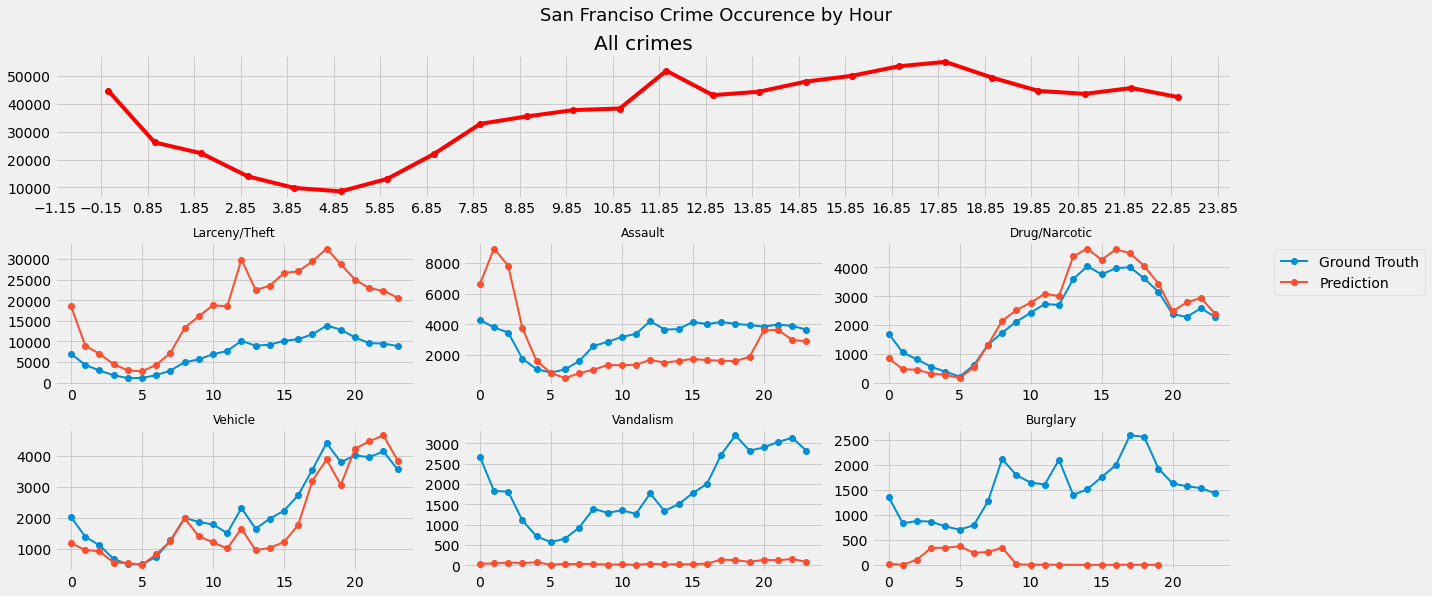

In [49]:
pylab.rcParams['figure.figsize'] = (20.0, 8.0)

larceny = sfc_train_df[sfc_train_df['Category'] == "LARCENY/THEFT"]
assault = sfc_train_df[sfc_train_df['Category'] == "ASSAULT"]
drug = sfc_train_df[sfc_train_df['Category'] == "DRUG/NARCOTIC"]
vehicle = sfc_train_df[sfc_train_df['Category'] == "VEHICLE THEFT"]
vandalism = sfc_train_df[sfc_train_df['Category'] == "VANDALISM"]
burglary = sfc_train_df[sfc_train_df['Category'] == "BURGLARY"]

larceny_pred = sfc_train_df_pred[sfc_train_df_pred['Category'] == "LARCENY/THEFT"]
assault_pred = sfc_train_df_pred[sfc_train_df_pred['Category'] == "ASSAULT"]
drug_pred = sfc_train_df_pred[sfc_train_df_pred['Category'] == "DRUG/NARCOTIC"]
vehicle_pred = sfc_train_df_pred[sfc_train_df_pred['Category'] == "VEHICLE THEFT"]
vandalism_pred = sfc_train_df_pred[sfc_train_df_pred['Category'] == "VANDALISM"]
burglary_pred = sfc_train_df_pred[sfc_train_df_pred['Category'] == "BURGLARY"]

with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
    ax1.plot(sfc_train_df.groupby('Hour').size(), 'ro-')
    ax1.set_title ('All crimes')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    
    ax2 = plt.subplot2grid((3,3), (1, 0))
    ax2.plot(larceny.groupby('Hour').size(), 'o-',linewidth=2)
    ax2.plot(larceny_pred.groupby('Hour').size(), 'o-',linewidth=2)
    ax2.set_title ('Larceny/Theft', size=12)
    
    ax3 = plt.subplot2grid((3,3), (1, 1))
    ax3.plot(assault.groupby('Hour').size(), 'o-',linewidth=2)
    ax3.plot(assault_pred.groupby('Hour').size(), 'o-',linewidth=2)
    ax3.set_title ('Assault', size=12)
    
    ax4 = plt.subplot2grid((3,3), (1, 2))
    ax4.plot(drug.groupby('Hour').size(), 'o-', label="Ground Trouth",linewidth=2)
    ax4.plot(drug_pred.groupby('Hour').size(), 'o-', label="Prediction",linewidth=2)
    ax4.set_title ('Drug/Narcotic', size=12)
    ax4.legend()
    ax4.legend(bbox_to_anchor=(1.1, 1.0))
    
    ax5 = plt.subplot2grid((3,3), (2, 0))
    ax5.plot(vehicle.groupby('Hour').size(), 'o-',linewidth=2)
    ax5.plot(vehicle_pred.groupby('Hour').size(), 'o-',linewidth=2)
    ax5.set_title ('Vehicle', size=12)
    
    ax6 = plt.subplot2grid((3,3), (2, 1))
    ax6.plot(vandalism.groupby('Hour').size(), 'o-',linewidth=2)
    ax6.plot(vandalism_pred.groupby('Hour').size(), 'o-',linewidth=2)
    ax6.set_title ('Vandalism', size=12)
    
    ax7 = plt.subplot2grid((3,3), (2, 2))
    ax7.plot(burglary.groupby('Hour').size(), 'o-',linewidth=2)
    ax7.plot(burglary_pred.groupby('Hour').size(), 'o-',linewidth=2)
    ax7.set_title ('Burglary', size=12)
  
    pylab.gcf().text(0.5, 1.03, 
                    'San Franciso Crime Occurence by Hour',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 18)
    
plt.tight_layout()
plt.show()

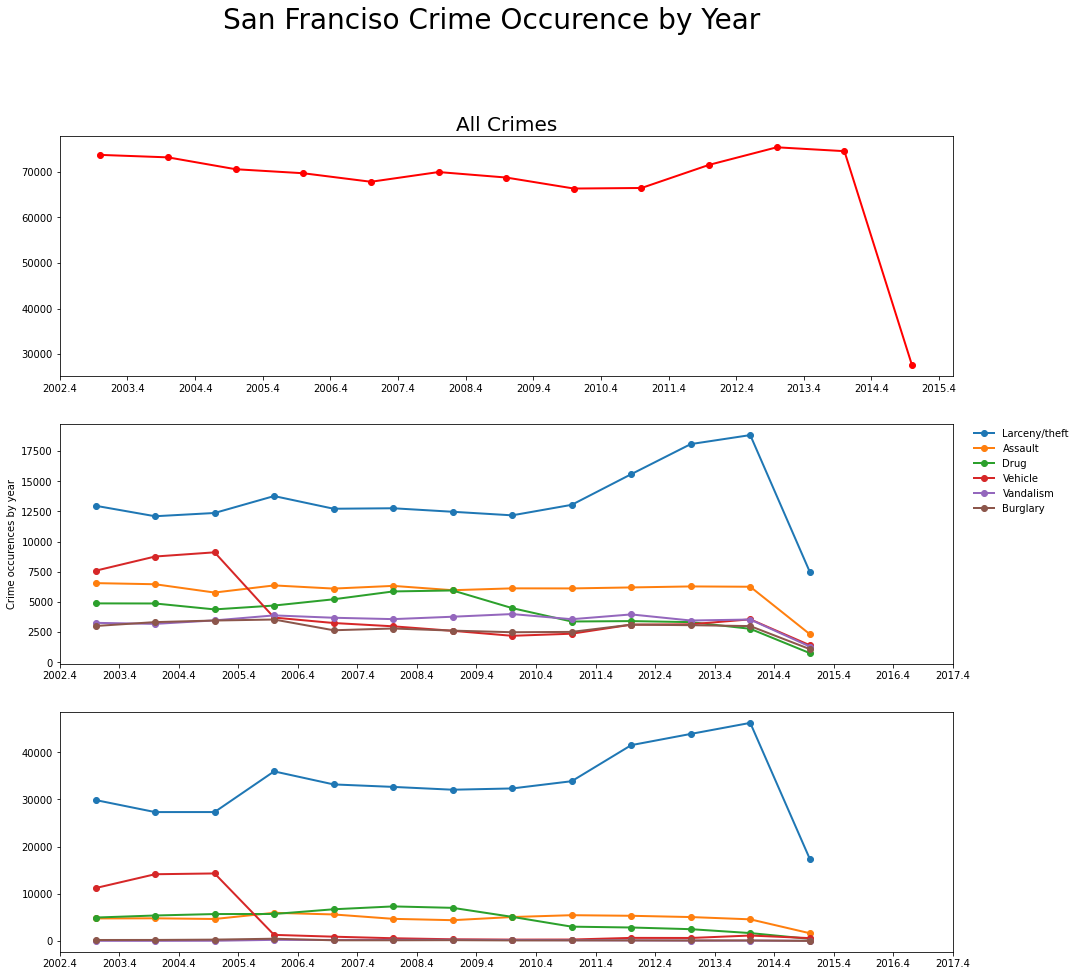

In [50]:
pylab.rcParams['figure.figsize'] = (16.0, 15.0)

h = [None]*6
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b']
crimes = ['Larceny/theft', 'Assault', 'Drug', 'Vehicle', 'Vandalism', 'Burglary']

years = sfc_train_df.groupby('Year').size().keys()
occursByYear = sfc_train_df.groupby('Year').size().values

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(years, occursByYear, 'ro-', linewidth=2)

ax1.set_title ('All Crimes', fontsize=20)

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 1))

# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Linear normalized plot for 6 top crimes
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3)

y = np.empty([6,13])
y[0] = larceny.groupby('Year').size().values
y[1] = assault.groupby('Year').size().values
y[2] = drug.groupby('Year').size().values
y[3] = vehicle.groupby('Year').size().values
y[4] = vandalism.groupby('Year').size().values
y[5] = burglary.groupby('Year').size().values

for i in range(0,6):
    h[i] = ax2.plot(years, y[i],'o-', color=color_sequence[i], lw=2)

ax2.set_ylabel("Crime occurences by year")

start, end = ax2.get_xlim()  
ax2.xaxis.set_ticks(np.arange(start, end+2, 1))

ax2.legend((item[0] for item in h), 
           crimes, 
           bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., frameon=False)

# Linear normalized plot for 6 top crimes
ax3 = plt.subplot2grid((3,3), (2,0), colspan=3)

y = np.empty([6,13])
y[0] = larceny_pred.groupby('Year').size().values
y[1] = assault_pred.groupby('Year').size().values
y[2] = drug_pred.groupby('Year').size().values
y[3] = vehicle_pred.groupby('Year').size().values
y[4] = vandalism_pred.groupby('Year').size().values

burglary_adjust = burglary_pred.groupby('Year').size()
burglary_adjust.loc[2015] = 0
y[5] = burglary_adjust.values

for i in range(0,6):
    h[i] = ax3.plot(years, y[i],'o-', color=color_sequence[i], lw=2)

start, end = ax3.get_xlim()  
ax3.xaxis.set_ticks(np.arange(start, end+2, 1))

pylab.gcf().text(0.5, 1.00, 
            'San Franciso Crime Occurence by Year',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)
plt.show()

<span style="color:red">**Evaluierung des Ergebnisse: Was würdet ihr interpretieren?**<span>

## 6. Abschlussbericht und Optimierungsemfehlungen<a name="Recommendation"></a>

### 6.1. Abschlussbericht

Wie in den vorangegangenen Abschnitten beschrieben, wurde ein vollständiger Zyklus der Datenverarbeitung durchgeführt, der zu einem zufriedenstellenden Vorhersagemodell führte.

Die größte Herausforderung bestand darin, dass es aufgrund der Beschaffenheit der Merkmale nur wenig Spielraum für das Feature Engineering gab. Dies ist ein schwer zu lösendes Problem mit einem stark unausgewogenen Datensatz und der Unvorhersehbarkeit (bis zu einem gewissen Punkt) des "menschlichen Faktors".

## 6.2. Optimierungspotenziale

Für weitere Optimierungen, über die dargestellte Analyse hinaus, können folgende Optimierungspotenziale herangezogen werden:
- Gewählte Trainingsmengen können verbessert werden: Die Nutzung vin einem Split in der Trainings- und Testmenge kann zu der Unterrepräsentation von bestimmten Labels geführt haben. Durch Ansätze wie Cross Validation können die Ergebnissen noch verbessert werden.
- Hyperparameter Tuning: In der durchgeführten Analyse hatten wir wenig Spielraum für FeatureEngineering. Durch die Verwendung von bestimmten Hyperparametern beim Trainieren der Modelle hätte die Perfomance nicht verbessert werden können.
- Verwendung von Adressen, Einbettungen oder eine andere Textverarbeitungstechnik: Indem wir extrahieren, ob der Vorfall an einem Häuserblock oder einer Kreuzung stattgefunden hat, haben wir den geringsten Gewinn aus diesem Merkmal gezogen, und vielleicht gibt es einige Muster, die wir ausnutzen können, um eine noch bessere Bewertung zu erhalten.